# Welcome to Correlation!
In this notebook, we will explore the concept of correlation through a real-world dataset. We'll learn how to perform a simple linear regression and test our dataset to see how it aligns with the assumptions underlying this statistical technique. Finally, we'll also talk about "spurious correlations," which is something that you need to watch out for as a data scientist!

In [22]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import linregress

let's go back to the city dataset we analyzed earlier

In [9]:
dict = {
    "state": ["Alabama","Alaska","Arizona","Arkansas","California","Colorado",
        "Connecticut","Delaware","Florida","Georgia","Hawaii","Idaho","Illinois",
        "Indiana","Iowa","Kansas","Kentucky","Louisiana","Maine","Maryland",
        "Massachusetts","Michigan","Minnesota","Mississippi","Missouri","Montana",
        "Nebraska","Nevada","New Hampshire","New Jersey","New Mexico","New York",
        "North Carolina","North Dakota","Ohio","Oklahoma","Oregon","Pennsylvania",
        "Rhode Island","South Carolina","South Dakota","Tennessee","Texas","Utah",
        "Vermont","Virginia","Washington","West Virginia","Wisconsin","Wyoming"],
    "capital": ["Montgomery", "Juneau", "Phoenix", "Little Rock", "Sacramento", "Denver",
        "Hartford", "Dover", "Tallahassee", "Atlanta", "Honolulu", "Boise", "Springfield",
        "Indianapolis", "Des Moines", "Topeka", "Frankfort", "Baton Rouge", "Augusta", "Annapolis",
        "Boston", "Lansing", "Saint Paul", "Jackson", "Jefferson City", "Helena",
        "Lincoln", "Carson City", "Concord", "Trenton", "Santa Fe", "Albany",
        "Raleigh", "Bismarck", "Columbus", "Oklahoma City", "Salem", "Harrisburg",
        "Providence", "Columbia", "Pierre", "Nashville", "Austin", "Salt Lake City",
        "Montpelier", "Richmond", "Olympia", "Charleston", "Madison", "Cheyenne"],
    "area": [159.8, 2716.7, 517.6, 116.2, 97.9, 153.3, 17.3, 22.4, 95.7, 
        133.5, 68.4, 63.8, 54.0, 361.5, 75.8, 56.0, 14.7, 76.8, 55.4, 6.73,
        89.6, 35.0, 52.8, 104.9, 27.3, 14.0, 74.6, 143.4, 64.3, 7.66, 37.3, 
        21.4, 114.6, 26.9, 210.3, 620.3, 45.7, 8.11, 18.5, 125.2, 13.0, 
        525.9, 305.1, 109.1, 10.2, 60.1, 16.7, 31.6, 68.7, 21.1],
    "population": [200, 31, 1660, 194, 509, 716, 125, 36, 181, 498, 360, 
        206, 116, 867, 203, 127, 26, 225, 19, 38, 694, 114, 285, 174, 43,
        28, 258, 55, 43, 85, 76, 98, 404, 61, 893, 649, 155, 50, 178, 129,
        14, 691, 964, 186, 8, 204, 46, 51, 233, 59]
}
capital_data = pd.DataFrame(dict)

is there a correlation between US State Capital area and population?

In [12]:
slope, intercept, r, p, se = linregress(capital_data['population'], capital_data['area'])
print(r**2)

0.029262449081312248


at first glance, it doesn't seem like it. our r-squared value is just about 0.03, indicating an extremely weak / insignificant relationship. but let's visualize the data just to make sure...

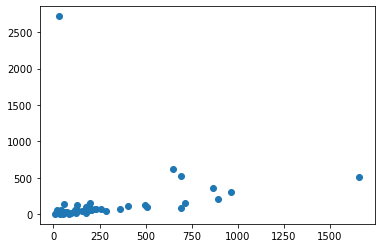

In [13]:
plt.scatter(capital_data['population'], capital_data['area'])

wow! it looks like we have a spurious point, where the state capital is almost 3000 square miles in area. let's try to spot this in our data frame

In [14]:
capital_data[capital_data['area'] > 2000]

,state,capital,area,population
1,Alaska,Juneau,2716.7,31


it seems like if we get rid of this one point, then we might see a relationship. let's investigate and see

In [18]:
capital_data_clean = capital_data.drop(1)
slope, intercept, r, p, se = linregress(capital_data_clean['area'], capital_data_clean['population'])
r**2

0.6192732565761606

sweet! this is a much stronger result--indicating a moderate relationship. is there any way that we can get the average population density of the capitals from our regression? (hint: the units will be people per square area)

In [25]:
print('The average US state capital (excluding Juneau) has a population density of',
    1000*np.round(slope, 3),
    'people per square mile.')

The average US state capital (excluding Juneau) has a population density of 1875.0 people per square mile.


Are there cases when we cannot perform a linear regression? **Absolutely**
1. if variation is too low in either dimension (not the case for us)
2. if the residuals are not normally distributed (we will test this below)
3. if the dataset is heteroskedastic (what's that?)
4. if the correlation is spurious (check this out: http://www.tylervigen.com/spurious-correlations)


## testing our residuals
to test our residuals, we will generate predictions of the population based on area using our linear regression model. then, we'll subtract the real population values from those predictions.

(array([ 1.,  1.,  1.,  4., 26.,  8.,  3.,  2.,  2.,  1.]),
 array([-586.90380113, -466.55086723, -346.19793333, -225.84499943,
        -105.49206553,   14.86086837,  135.21380227,  255.56673617,
         375.91967007,  496.27260397,  616.62553787]),
 <BarContainer object of 10 artists>)

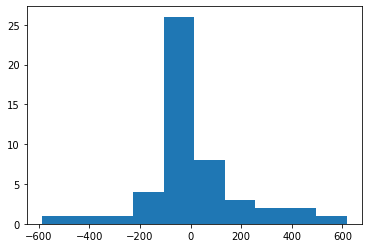

In [37]:
# real population values
pop = capital_data_clean['population']

# real area values
area = capital_data_clean['area']

# predicted population values
pop_pred = slope*area+ intercept

# compute the residuals
residuals = pop - pop_pred

# this looks ok, but not perfectly normal either.
# likely, there is more to the story than just a simple linear regression!
plt.hist(residuals)